# ML

## ML_Classifier
Dataset : seeds_dataset.txt

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


# 파일 경로 설정
file_path = "C:/Users/yoojm/Gachon/2학년 1학기/인공지능개론_이명규/Dataset/seeds_dataset.txt"

# 데이터를 DataFrame으로 읽기
df = pd.read_csv(file_path, header=None, delimiter='\t')

# 데이터 확인
df

ParserError: Error tokenizing data. C error: Expected 8 fields in line 8, saw 10


In [28]:
# 범주형 데이터를 숫자로 인코딩하기
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = [0,1,2,3,4,5,6]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# 데이터 확인
print(df)

      0  1  2  3  4  5  6
0     3  3  0  0  2  1  2
1     3  3  0  0  2  2  2
2     3  3  0  0  2  0  2
3     3  3  0  0  1  1  2
4     3  3  0  0  1  2  2
...  .. .. .. .. .. .. ..
1723  1  1  3  2  1  2  1
1724  1  1  3  2  1  0  3
1725  1  1  3  2  0  1  2
1726  1  1  3  2  0  2  1
1727  1  1  3  2  0  0  3

[1728 rows x 7 columns]


In [29]:
# 컬럼명 확인
df.columns

Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [30]:
df[6].value_counts()

6
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [31]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [32]:
df = df.dropna()
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [33]:
X=df.drop(6,axis=1)
X.head()

,0,1,2,3,4,5
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [34]:
y=df[6]
y.value_counts()

6
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [35]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [36]:
# train 세트 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [37]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [38]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

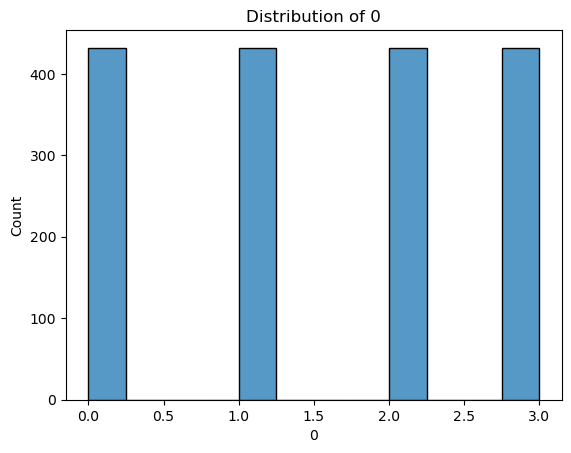

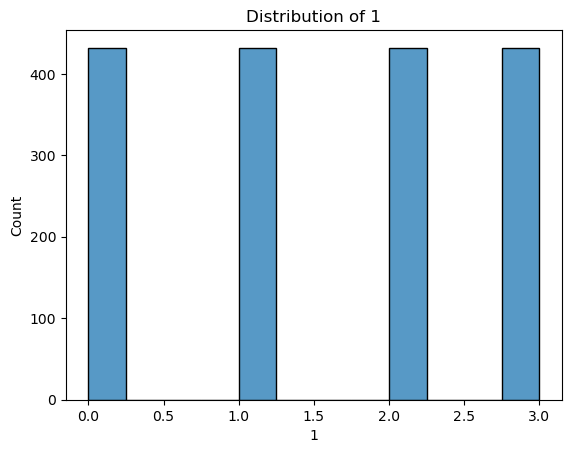

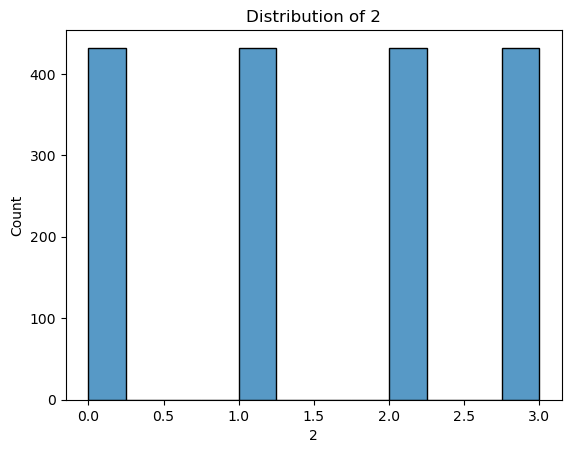

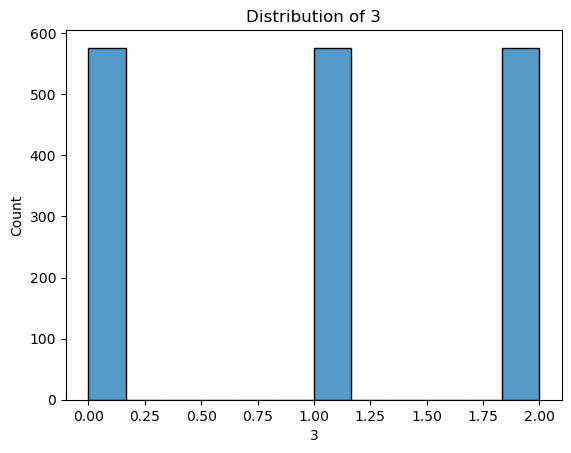

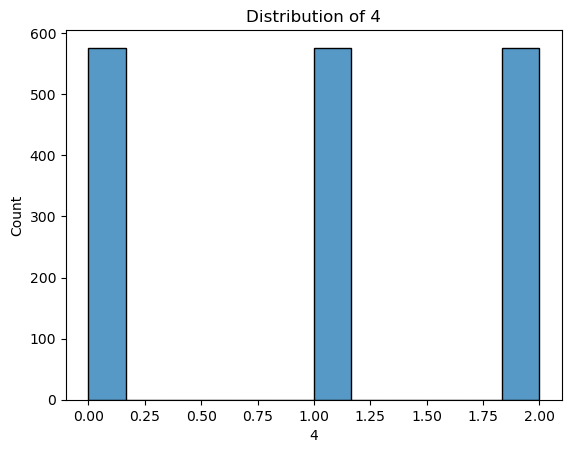

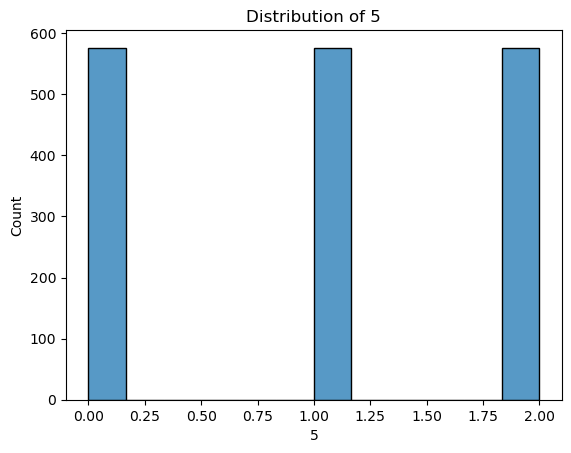

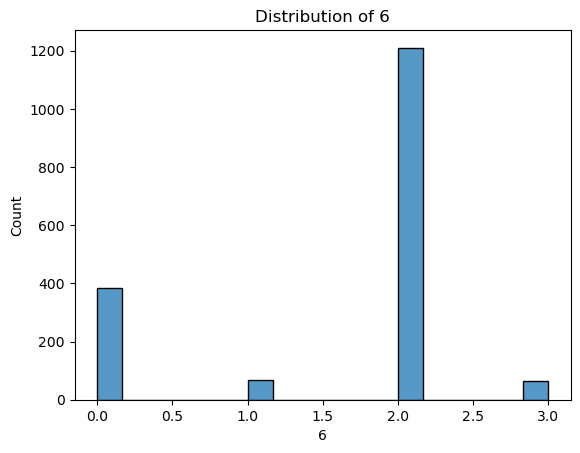

In [39]:
# 레이블 분포(Labeling Distribution): 각 클래스의 분포 확인
for column in df.columns:
    if df[column].dtype != 'object':
        sns.histplot(df[column])
        plt.title(f'Distribution of {column}')
        plt.show()

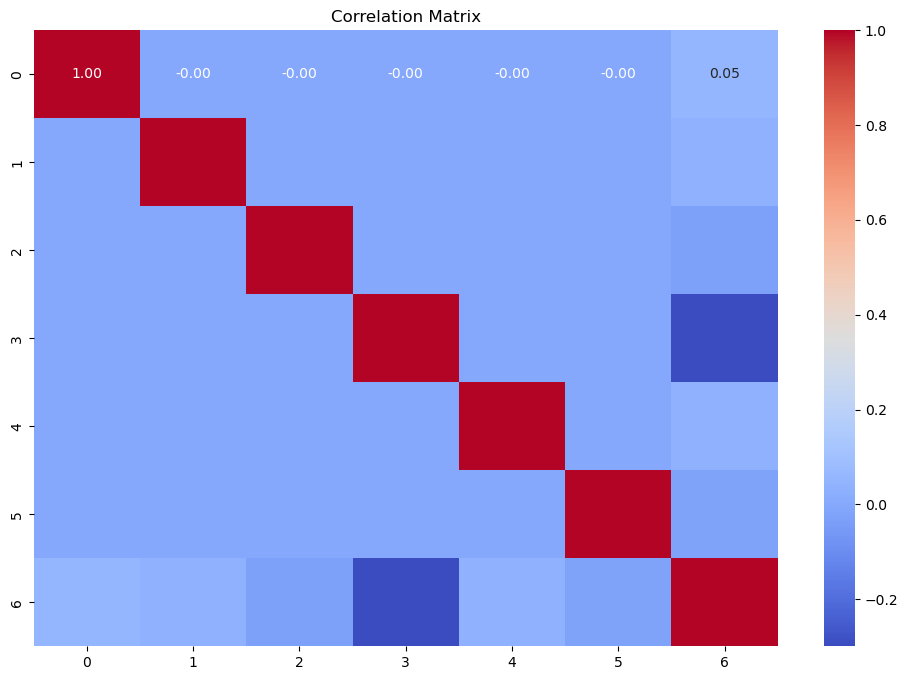

In [40]:
# 상관관계(Corelation): 변수 간의 상관관계 확인
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [46]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9768518518518519
[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]]


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9745370370370371
[[ 95   3   1   0]
 [  2  19   0   0]
 [  3   0 293   0]
 [  2   0   0  14]]


In [ ]:
# Build a logistic regression classifier and predict

# 데이터를 4개로 나눈 상황
# X는 feature이고, y는 label

clf_lr = LogisticRegression(random_state=0)  # 모델 생성
clf_lr.fit(X_train, y_train)  # 모델 훈련

pred_lr = clf_lr.predict(X_test)  # 예측

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))  # 실제값과 예측값 비교
print (confusion_matrix(y_test, pred_lr))